<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

This live training will review the concepts of statistical inference laid out in the DataCamp courses [Statistical Thinking in Python I](https://learn.datacamp.com/courses/statistical-thinking-in-python-part-1) and [Statistical Thinking in Python II](https://learn.datacamp.com/courses/statistical-thinking-in-python-part-2). The concepts of those courses were reviewed and fortified in [Case Studies in Statistical Thinking](https://learn.datacamp.com/courses/case-studies-in-statistical-thinking). You can link to those courses by clicking on the badges below.

<div style="margin: auto; width: 400px;">

<a href="https://learn.datacamp.com/courses/statistical-thinking-in-python-part-1"><img src = "https://assets.datacamp.com/production/course_1549/shields/original/shield_image_course_1549_20191010-1-13inj9n?1570728356" width="100px"></a>
<a href="https://learn.datacamp.com/courses/statistical-thinking-in-python-part-2"><img src = "https://assets.datacamp.com/production/course_1550/shields/original/shield_image_course_1550_20180911-13-4iztc?1536680442" width="100px"></a>
<a href="https://learn.datacamp.com/courses/case-studies-in-statistical-thinking"><img src = "https://assets.datacamp.com/production/course_4674/shields/original/shield_image_course_4674_20190318-13-1c5k8sf?1552948884" width="100px"></a> 

</div>


Our goal here is to reinforce the concepts and techniques of statistical inference using hacker stats to help students gain confidence applying them to new data analysis tasks. In this part of the training, we will:

- Review fundamental notions of probability and clarify the tasks of statistical inference.
- Perform graphical exploratory data analysis (EDA).
- Review concepts of confidence intervals.
- Apply bootstrap methods for computing confidence intervals.

 
We will do all of this using a data set (described [below](#The-Dataset)) which explores how sleep deprivation affects facial recognition tasks in humans.

## **Necessary packages**

It is good practice to always have necessary package imports at the top of any `.py` file or notebook, so let's get our imports in before moving on.

Unless I'll be plotting very large data sets (which is not the case in this live training), I generally also like to set the figure format to be SVG. This avoids a pixelated look to the plots.

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# I want crisp graphics, so we'll output SVG
%config InlineBackend.figure_format = 'svg'

## **Statistical inference**

In this section of the notebook, I will discuss the goals of statistical inference and lay out the approach we will take. You may have seen these ideas presented before, but in my experience, investigating a topic from multiple angles leads to a much fuller understanding, and that is my goal here.

We will dive into our (rather fun) data set momentarily, but for now, we will go over some important theoretical background to make sure we understand what statistical inference is all about, and how the hacker stats approach works.

### **What is probability?**

To think about what probability means, consider an example. Say I am interested in the heights of American adult women. If we were to select an American woman at random, I think we would all agree that she is probably going to be under 190 cm (about 6' 3"). We just used the word "probably!" To see what we mean by that, let's pick another woman at random. And another. And another. And another. We do this over and over and over. Eventually, we will pick a woman who is over 190 cm tall (for example basketball legend [Lisa Leslie](https://en.wikipedia.org/wiki/Lisa_Leslie) is 196 cm). So, the probability that a randomly chosen woman is over 190 cm is not zero, but is is small.

We can directly apply this mode of thinking to give us an interpretation of probability, referred to as the **frequentist interpretation of probability**. The probability of an observation represents a long-run frequency over a large number of identical repetitions of a measurement/data collection. These repetitions can be, and often are, hypothetical.

### **Probability distributions and CDFs**

A **probability distribution** provides the link between observations to probability. For example a Normal distribution might link women's heights to probability. It is highly probable that a woman is between 150 and 180 cm (about five and six feet) tall, but improbable that a woman is above 190 cm.

These statements of probability stem from the **cumulative distribution function** (CDF) associated with a probability distribution. The CDF evaluated at _x_ is defined as follows.

>CDF(_x_) = probability of observing a value less than or equal to _x_.

To get an idea of what a CDF might look like when we plot it, we can plot the CDF for a Normal distribution, say describing the height of American adult women. They average 165 cm, with a standard deviation of 9 cm. The mathematical expression for the CDF is complicated but known, and we can use the built-in functions in `scipy.stats` to generate the values.

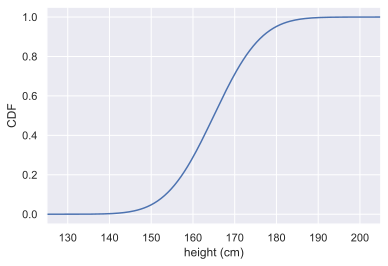

In [2]:
# x-values for height CDF
x = np.linspace(125, 205, 200)

# Values of the CDF
cdf = scipy.stats.norm.cdf(x, 165, 9)

# Make the plot
_ = plt.plot(x, cdf)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('CDF')
_ = plt.margins(x=0)

Remember, the CDF evaluated at a given position along the x-axis is the probability of having an observation less than or equal to _x_. So, if we look at _x_ = 160 cm, we see that the probability that a woman is shorter than 160 cm is about 0.3.

Importantly, the CDF contains all of the information about a distribution.

### **Generative distributions**

Say we did the experiment of measuring women's heights. For cost reasons (time and money), we can measure 100 women to get 100 height measurements. We might expect about 30 of these measurements to be below 160 cm and, based on the CDF above, about 7 of these measurements to be above 180 cm. This assumes that the distribution that provides that link between height measurements and probability is in fact a Normal distribution. If this is true, then the Normal distribution *generates* the data; it is the **generative distribution**.

If we *know* the true generative distribution, then drawing random numbers out of the distribution is the same as performing the measurements themselves. We can draw random numbers out of a probability distribution using the `numpy.random` module. So, we can "repeat" the measurement of 100 women by drawing out of the generative distribution.

In [3]:
# For reproducibility, seed the random number generator
np.random.seed(3252)

# Draw 100 measurments from a normal with mean 165 and std 9
heights = np.random.normal(165, 9, size=100)

---

<center><h1> Q&A 1</h1> </center>

---

### **The empirical cumulative distribution function**

It is useful to plot the **empirical cumulative distribution function**, or ECDF, when doing exploratory data analysis. The ECDF at position _x_ is defined as

>ECDF(_x_) = fraction of data points ≤ _x_.

Compare this to the definition of the CDF.

>CDF(_x_) = probability of observing a value less than or equal to _x_.

Think about the frequentist interpretation of probability. If we had many, many measurements, then the fraction of data points less than or equal to _x_ is in fact the *probability* of observing a value less than or equal to _x_. So, the ECDF is close to the CDF. The differences between an ECDF and the CDF of the generative distribution are due entirely to the fact that we have only a finite number of measurements for the ECDF.

To plot an ECDF, the x-coordinate of a dot is the value of a data point. The y-value is the fraction of data points less or equal to the x-value. We can write a function to generate the x- and y-values for the ECDF.

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

We can use this function to add the ECDF to our plot of the generative CDF.

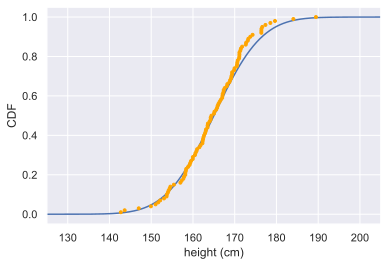

In [5]:
# Compute ECDF
x_ecdf, y_ecdf = ecdf(heights)

# Make the plot
_ = plt.plot(x, cdf)
_ = plt.plot(x_ecdf, y_ecdf, marker=".", linestyle="none", color="orange")
_ = plt.xlabel("height (cm)")
_ = plt.ylabel("CDF")
_ = plt.margins(x=0)

Indeed, the ECDF closely matches the CDF, but we do see variation from it, owing to the small sample size of 100. If we increase the sample size to 1000, the ECDF follows more closely.

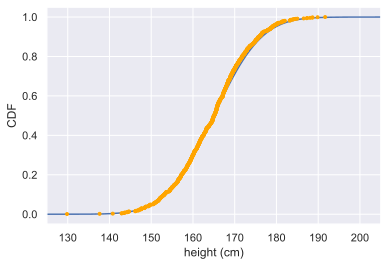

In [6]:
# Draw more heights
heights = np.random.normal(165, 9, size=1000)

# Compute ECDF
x_ecdf, y_ecdf = ecdf(heights)

# Make the plot
_ = plt.plot(x, cdf)
_ = plt.plot(x_ecdf, y_ecdf, marker=".", linestyle="none", color="orange")
_ = plt.xlabel("height (cm)")
_ = plt.ylabel("CDF")
_ = plt.margins(x=0)

### **The task of statistical inference**

In the above example, we knew the generative distribution. If we did actually know the generative distribution ahead of time, there would be no point in doing measurements. We generally do not know what the generative distribution is, so we collect data. **The task of statistical inference is to deduce the properties of a generative distribution of data.**

### **The plug-in principle**

We could imagine that we knew (or strongly suspected) that the generative distribution for American women's heights is Normal, but we do not know the parameters. In this case, the statistical inference task is largely to characterize the parameters of the generative distribution.

But imagine we do not know anything a priori about the generative distribution. We still make measurements, and the measurements are all we have. We do not know anything about the CDF, but we do know the ECDF. As the CDF defines a generative distribution, so too does the ECDF define an **empirical distribution**. We can proceed with statistical inference by using the empirical distribution in place of the (unknown) generative distribution. This approximation is referred to as the **plug-in** principle, as we "plug in" the empirical distribution for the generative distribution. This principle underlies many **non-parametric** approaches to statistical inference, so named because we are not trying to find parameters of a generative distribution, but are using only information from the data themselves. Application of the plug-in principle is the approach we take in this tutorial.

### **Properties of distributions via plug-in estimates**

One-dimensional distributions have properties you may have heard of, like means, medians, and variances. Imagine we have a set of measurements stored in a NumPy array `x`. Then, the plug-in estimates for the various properties of the generative distribution are shown in the table below.

| Property           | Plug-in estimate      |
|--------------------|-----------------------|
| mean               | `np.mean(x)`          |
| median             | `np.median(x)`        |
| variance           | `np.var(x)`           |
| standard deviation | `np.std(x)`           |
| _p_ percentile     | `np.percentile(x, p)` |



Two-dimensional distributions additionally have properties like covariances and correlations. We can also estimate these using the plug-in principle. Let `x` and `y` be NumPy arrays. Then, for two-dimensional distributions, the plug-in estimates are:

| Property           | Plug-in estimate              |
|--------------------|-------------------------------|
| covariance         | `np.cov(x, y, ddof=0)[0, 1]`  |
| correlation        | `np.corrcoef(x, y)[0, 1]`     |


---

<center><h1> Q&A 2</h1> </center>

---

We have now laid the theoretical groundwork. In the data set we present below and subsequent analysis, we will use the plug-in principle to deduce properties about the generative distribution. For each set of measurements we consider, we will use the empirical distribution as a plug-in replacement for the unknown generative distribution and compute relevant properties.

## **The Dataset**

The data set in this webinar comes from a study by [Beattie, et al.](https://doi.org/10.1098/rsos.160321) in which they used the [Glasgow Facial Matching Test](https://en.wikipedia.org/wiki/Glasgow_Face_Matching_Test) (GFMT, [original paper](https://doi.org/10.3758/BRM.42.1.286)) to investigate how sleep deprivation affects a human subject's ability to match faces, as well as the confidence the subject has in those matches. Briefly, the test works by having subjects look at a pair of faces. Two such pairs are shown below.

<p align="center">
<img src="https://github.com/datacamp/Hacker-Stats-in-Python-Live-Training/blob/master/assets/gfmt_faces.png?raw=True" alt="GFMT faces" width="400px">
</p>
<br>

For each of 40 pairs of faces, the subjects gets as much time as needed and then says whether or not they are the same person. The subjects then rates their confidence in the choice.

In this study, subjects also took surveys to determine properties about their sleep. The surveys provide three different metric of sleep quality and wakefulness. 

- The Sleep Condition Indicator (SCI) is a measure of insomnia disorder over the past month. High scores indicate better sleep and scores of 16 and below indicate insomnia. 
- The Pittsburgh Sleep Quality Index (PSQI) quantifies how well a subject sleeps in terms of interruptions, latency, etc. A higher score indicates poorer sleep. 
- The Epworth Sleepiness Scale (ESS) assesses daytime drowsiness. Higher scores indicate greater drowsiness.

In this live training, we will explore how insomnia affects subjects' ability to discern faces.

### **Loading and inspecting the data set**

Let's load in the data set provided by Beattie and coworkers. We'll load in the data set and check out the first few rows using the `head()` method of pandas DataFrames. Importantly, missing data in this data set are denoted with an asterisk, which we specify using the `na_values` keyword argument.

In [7]:
# Read in the dataset
df = pd.read_csv(
    "https://github.com/datacamp/Hacker-Stats-in-Python-Live-Training/blob/master/data/gfmt_sleep.csv?raw=True",
    na_values="*",
)

# Print header
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12


Here is some information about what is contained in each of the columns.

- `participant number`: Unique identifier for each subject
- `age`: Age of subject in years
- `correct hit percentage`: Percentage of correct responses among trials for which the faces match
- `correct reject percentage`: Percentage of correct responses among trials for which the faces do not match
- `percent correct`: Percentage of correct responses among all trials
- `confidence when correct hit`: Average confidence when the subject gave a correct response for trials for which the faces match
- `confidence when incorrect hit`: Average confidence when the subject gave an incorrect response for trials for which the faces match
- `confidence when correct reject`: Average confidence when the subject gave a correct response for trials for which the faces do not match
- `confidence when incorrect reject`: Average confidence when the subject gave an incorrect response for trials for which the faces do not match
- `confidence when correct`: Average confidence when the subject gave a correct response for for all trials
- `confidence when incorrect`: Average confidence when the subject gave a correct response for for all trials
- `sci`: The subject's Sleep Condition Indicator.
- `psqi`: The subject's Pittsburgh Sleep Quality Index.
- `ess`: The subject's Epworth Sleepiness Scale.

Going forward, it will be useful to separate the subjects into two groups, insomniacs and normal sleepers. We will therefore add an `'insomnia'` column to the DataFrame with True/False entries. Recall that a person is deemed an insomniac if their SCI is 16 or below.

In [8]:
# Add a column to the data frame for insomnia
df['insomnia'] = df['sci'] <= 16

It is important to know how many total subjects are included, so we can check on the length of the DataFrame.

In [9]:
len(df)

102

So, we have 102 subjects, hopefully enough to make meaningful comparisons.

With our data set in place, we can get moving with statistical inference.

## **Our approach**

In this live training, we will use statistical inference to address the following question of the data:

1. How different is the facial matching performance of insomniacs versus normal sleepers?

In our next live training, we will address other aspects of the data set.

2. How different is *confidence* in facial matching for insomniacs versus normal sleepers?
3. How are the different sleep metrics correlated?
4. How do sleep metric *correlate* with facial matching performance?

Each question requires a different sort of analysis involving calculation of confidence intervals (this session) and p-values (the next session). Along the way, we will introduce the necessary theoretical and technical concepts.

Note that even though this live training is about statistical inference, is is always important to do EDA first. Remember what [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) said,

> "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."

In each of the analyses, we will start with exploratory data analysis.

## **1. Performance of insomniacs versus normal sleepers**

Our first investigation is into how well insomniacs perform the face matching task versus normal sleepers. As or first step in exploratory data analysis, we will make a plot of the ECDF of the percent correct on the facial matching test for the two categories.

As our first, step, we will compare the means of the two data sets. To do, we will extract the values of the `'percent correct'` column of the DataFrame for normal sleepers and for insomniacs. We will be sure to drop any missing data (NaNs). We will also convert these respective pandas Series to NumPy arrays, which enable faster computing.

In [10]:
# Extract percent correct for normal sleepers
pcorr_normal = df.loc[~df['insomnia'], 'percent correct'].dropna().values

# Extract percent correct for insomniacs
pcorr_insom = df.loc[df['insomnia'], 'percent correct'].dropna().values

We can now compute the ECDFs and plot them.

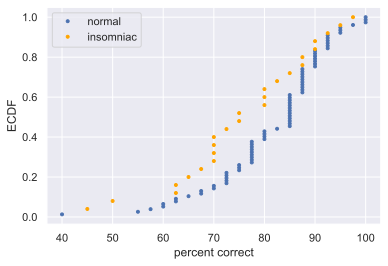

In [11]:
# Compute ECDF for normal sleepers
x_normal, y_normal = ecdf(pcorr_normal)

# Compute ECDF for insomniacs
x_insom, y_insom = ecdf(pcorr_insom)

# Make plot of ECDFs
_ = plt.plot(x_normal, y_normal, marker=".", linestyle="none", label="normal")
_ = plt.plot(
    x_insom,
    y_insom,
    marker=".",
    linestyle="none",
    color="orange",
    label="insomniac",
)
_ = plt.xlabel("percent correct")
_ = plt.ylabel("ECDF")
_ = plt.legend()

There are clearly fewer data points for insomniacs (25 versus 77 for normal sleepers), which will be important to consider as we do statistical inference. In eyeballing the ECDFs, it appears that those without insomnia perform a bit better; the ECDF is shifted rightward toward better scores.

### **Plug-in estimates**

We have already computed a plug-in estimate! The ECDF itself is a plug-in estimate for the CDF. From the ECDF, we can also directly read off plug-in estimates for any percentile. For example, the median is the 50th percentile; it is the percent correct where the ECDF is 0.5. That is, half of the measurements lie below and half above. The median for normal sleepers is 85 and that for insomniacs is 75, a 10% difference.

We can also get plug-in estimates for the mean. These we can't read directly off of the ECDF, but we can compute them using the `np.mean()` function.

In [12]:
# Plug in estimates for means
pcorr_normal_mean = np.mean(pcorr_normal)
pcorr_insom_mean = np.mean(pcorr_insom)

# Print the results
print("Plug-in estimates for the mean pecent correct:")
print("normal sleepers:", pcorr_normal_mean)
print("insomniacs:     ", pcorr_insom_mean)

Plug-in estimates for the mean pecent correct:
normal sleepers: 81.46103896103897
insomniacs:      76.1


There is about a 5% difference in the mean scores. In looking at the ECDFs, it seems like this (or the median) might be a good difference to use to compare insomniacs and normal sleepers because the ECDFs are similar at the tails (low and high percent correct), but differ in the middle.

### **Computing a confidence interval**

So, we are now faced with the question: If I were to do the same experiment again, how much variation would I get in the mean percent correct? Might we again see that the insomniacs perform more poorly?

To answer this questions, we can compute a **confidence interval**. A **confidence interval** for a value computed from the data, which we will refer to as an **estimate**, can be defined as follows.

>If an experiment is repeated over and over again, the estimate I compute will lie between the bounds of the 95% confidence interval for 95% of the experiments.

So, all we have to do is go to Scotland, randomly select 102 people, 27 of whom are insomniacs, and perform the face matching test, record the results, and compute the mean for insomniacs and normal sleepers. Then, we have to go back to Scotland again, do the whole procedure again, and do that again, and again, and again. Simple, right? 

Of course, we can't do that! But remember that performing an experiment is the same thing as drawing random samples out of the generative distribution. Because the generative distribution is unknown, the only way we know how to sample out of it is to literally do the experiment again, which is just not possible. However, we can use the plug-in principle to *approximate* the generative distribution with the empirical distribution. We *can* sample out of the empirical distribution using NumPy's random number generation! A sample of a new data set drawn from the empirical distribution is called a **bootstrap sample**. 

Imagine we have set of measurements stored in NumPy array `data`. To get a bootstrap sample, we use `np.random.choice()` to draw `len(data)` numbers out of the array `data`. We do this *with replacement*. The result is a bootstrap sample. The syntax is

    bs_sample = np.random.choice(data, len(data))
    
The bootstrap sample is approximately a new data set drawn from the generative distribution.

After drawing a bootstrap sample, we want to compute the mean in order to see how it will change from experiment to experiment. A mean (or other value of interest) computed from a bootstrap sample is referred to as a **bootstrap replicate**. We can write a function to compute a bootstrap replicate. This function takes as arguments a 1D array of data `data` and a function `func` that is to be applied to a bootstrap sample to return a bootstrap replicate.

In [13]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample)

Now, we want to compute many of these replicates so we can see what range of values for the mean comprises the middle 95%, which is give a 95% confidence interval. It is therefore useful to write a function to draw many bootstrap replicates.

In [14]:
def draw_bs_reps(data, func, size=1):
    """Draw `size` bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Excellent! Let's put these functions to use to draw bootstrap replicates of the mean for normal sleepers and for insomniacs. Because this calculation is fast, we can "do" the experiment over and over again many times. We'll do it 10,000 times.

In [15]:
# Draw bootstrap replicates for the mean
bs_reps_normal = draw_bs_reps(pcorr_normal, np.mean, size=10000)
bs_reps_insom = draw_bs_reps(pcorr_insom, np.mean, size=10000)

# Take a quick peak
bs_reps_normal

array([78.73376623, 81.46103896, 79.83766234, ..., 83.44155844,
       79.51298701, 79.48051948])

The replicates are stored in NumPy arrays of length 10,000. The values hover around the means, but they do vary.

We can compute the percentiles of the bootstrap replicates using the `np.percentile()` function. We pass in the array we want to compute percentiles for, followed by a list of the percentiles we want. For a 95% confidence interval, we can use `[2.5, 97.5]`, which will give the middle 95% of the samples.

In [16]:
# Compute 95% confidence intervals of the mean
conf_int_normal = np.percentile(bs_reps_normal, [2.5, 97.5])
conf_int_insom = np.percentile(bs_reps_insom, [2.5, 97.5])

# Print confidence intervals
print("Normal sleepers:", conf_int_normal)
print("Insomniacs:     ", conf_int_insom)

Normal sleepers: [78.86363636 83.8961039 ]
Insomniacs:      [70.9 81. ]


The 95% confidence interval of the mean for normal sleepers ranges over 5%, from 79 to 84%. That for insomniacs is twice as wide, ranging from 71 to 81%. 

### **Hence, "hacker stats"**

Computing a confidence interval is not a trivial task if we seek to do it analytically by pen and paper. A "hacker stats" approach involves direct application of the plug-in principle and frequentist interpretation of probability to do statistical inference by random number generation. Because it involves coding rather than pen-and-paper work, we call our approach here "hacker stats."

---

<center><h1> Q&A 3</h1> </center>

---

### **Visualizing confidence intervals**

The confidence intervals we printed above are useful, but the confidence intervals are perhaps better visualized graphically. The function below generates a plot of confidence intervals. Since our focus here is primarily on the concepts behind inference, you may for now take the plotting function as a black box. Briefly, we are using the more object-oriented mode of plotting with Matplotlib where we first generate a `Figure` object and an `AxesSubplot` object using `plt.subplots()`. We then use the methods of the `AxesSubplot` object to populate the plot with markers and to make further modification to the plot, such as adding axis labels. We plot the plug-in estimate (in this case, the mean) as a dot and the confidence interval as a line.

The function takes as arguments a list of categories, a list of plug-in estimates, and a list of confidence intervals.

In [17]:
def plot_conf_ints(categories, estimates, conf_ints, palette=None):
    """Plot confidence intervals with estimates."""
    # Set a nice color palette
    if palette is None:
        palette = [
            "#1f77b4",
            "#ff7f0e",
            "#2ca02c",
            "#d62728",
            "#9467bd",
            "#8c564b",
            "#e377c2",
            "#7f7f7f",
            "#bcbd22",
            "#17becf",
        ]
    elif type(palette) == str:
        palette = [palette]
    palette = palette[: len(categories)][::-1]

    # Set up axes for plot
    fig, ax = plt.subplots(figsize=(5, len(categories) / 2))

    # Plot estimates as dots and confidence intervals as lines
    for i, (cat, est, conf_int) in enumerate(
        zip(categories[::-1], estimates[::-1], conf_ints[::-1])
    ):
        color = palette[i % len(palette)]
        ax.plot(
            [est],
            [cat],
            marker=".",
            linestyle="none",
            markersize=10,
            color=color,
        )

        ax.plot(conf_int, [cat] * 2, linewidth=3, color=color)

    # Make sure margins look ok
    ax.margins(y=0.25 if len(categories) < 3 else 0.125)

    return ax

All right! Let's use this to make a plot.

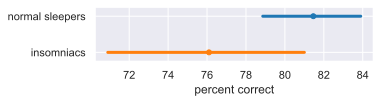

In [18]:
# Make plot
ax = plot_conf_ints(
    ["normal sleepers", "insomniacs"],
    [pcorr_normal_mean, pcorr_insom_mean],
    [conf_int_normal, conf_int_insom],
)
_ = ax.set_xlabel("percent correct")

The difference in the length of the confidence interval is starkly apparent on the plot. Because we had fewer measurements for insomniacs, we can't be too precise in what mean values we might get.

In looking at the plot of confidence intervals, it seems possible that if we did the experiment again, we might even get a scenario where insomniacs perform *better* than normal sleepers. But how likely is such a scenario?

### **Confidence interval for difference of means**

Remember that we are not restricted for what estimates we can compute confidence intervals. We can instead compute a confidence interval on the *difference* of means between normal sleepers and insomniacs. To do this, we do the following procedure, which again uses the plug-in principle to "do" the experiment again to get a bootstrap replicate of the difference of means.

1. Generate a bootstrap sample of percent correct for normal sleepers.
2. Generate a bootstrap sample of percent correct for insomniacs.
3. Take the mean of each bootstrap sample, giving a bootstrap replicate for the mean of each.
4. Subtract the mean for insomniacs from that of normal sleepers.

This is actually trivial to do now because we have already computed and stored bootstrap replicates of the means! We simply have to subtract them.

In [19]:
# Get bootstrap replicates for difference of means
bs_reps_diff_of_means = bs_reps_normal - bs_reps_insom

Now, we can compute the confidence interval by finding the percentiles.

In [20]:
np.percentile(bs_reps_diff_of_means, [2.5, 97.5])

array([-0.15467532, 11.04694805])

The confidence interval just barely crosses zero, suggesting that the insomniacs will rarely perform better than normal sleepers. 

We can find out the *probability* of having the insomniacs perform better than the normal sleepers by counting how many times the mean percent correct for insomniacs exceeded that of normal sleepers and dividing by the total number of bootstrap replicates. To do the count, we can make an array containing `True` and `False` values for whether or not the difference of means is negative and sum the result (since `True` is worth 1 and `False` is worth 0).

In [21]:
# Compute probability of having insomniacs have better mean score
np.sum(bs_reps_diff_of_means <= 0) / len(bs_reps_diff_of_means)

0.0294

So, if we were to do the experiment again, there is about a 3% chance we would observe the insomniacs performing at parity of better than the normal sleepers, at least based on the observations we have. If we did more actual observations, this chance could rise or fall; we cannot know without more measurements.

### **Summarizing the results in a report**

There are many opinions about displaying the results of an analysis like this one. For me, the ECDFs are the most instructive part of our analysis, and I think they should be the central point of the discussion. In my experience, I have met resistance on presenting ECDFs because they are not in as common use as, say, bee swarm (strip) plots, histograms, box plots, or bar graphs. I hear the argument that because they are less common, other people may find them difficult to interpret.

With the exception of the bee swarm plots, all of these kinds of plots fail to plot all of the data. You (or someone in your organization) spent a lot of time and money to get you the data; you should display it all if you can.

The bee swarm plots, while useful visualizations, are not as clear as ECDFs in showing of the data are distributed. Remember the task of statistical inference: You are trying to learn about the (unknown) generative distribution. The ECDF is an approximation of its CDF, made by plotting all of your data. You can't really get better than that.

I therefore advocate for educating your organization in reading and interpreting ECDFs. They are exceptionally effective graphics, and time spent learning how to interpret them is well worth it.

In addition to the ECDFs, I would also include the summary plot of the 95% confidence intervals of the mean. It helps establish what would happen if we did the experiment again; how big of a difference is there in performance between normal sleepers and insomniacs compared to changes due to variation and finite sample size?

So, my summary report would look something like this....

#### **Sleep deprivation and facial matching**

Twenty-seven subjects suffering from insomnia and seventy-five subjects with normal sleeping patterns were subjected to the short version of the Glasgow Facial Matching Test, comparing 40 pairs of faces each. The subjects' performance was scored based on the percent of the face matching tasks they identified correctly.

Below is an empirical cumulative distribution function describing the results.

<p align="center">
<img src="https://github.com/datacamp/Hacker-Stats-in-Python-Live-Training/blob/master/assets/pcorr_ecdf.svg?raw=True" alt="percent correct ecdf" width="400px">
</p>
<br>

The distribution for insomniacs is clearly shifted leftward relative to that for normal sleepers, indicating that insomniacs have poorer performance in face matching tasks. The tails of the distributions are similar; both groups have some very poor performers and some very good performers. The key difference lies in the middle of the distribution.

Below is a plot of the 95% confidence interval for the mean percent correct for normal sleepers and insomniacs.

<p align="center">
<img src="https://github.com/datacamp/Hacker-Stats-in-Python-Live-Training/blob/master/assets/pcorr_conf_int.svg?raw=True" alt="percent correct conf int" width="400px">
</p>
<br>

The uncertainty in the estimate for insomniacs is due to the smaller sample size. As an estimate, the difference in mean performance in the facial matching task is about 5%.

---

<center><h1> Q&A 4</h1> </center>

---

## Conclusions

Measured data come from an unknown generative distribution, and the job of statistical inference is to learn as much as we can about that generative distribution. Hacker stats enables us to use the plug-in principle, in which the generative distribution is approximated by the empirical distribution, to obtain this information using random number generation on our computers.

In this live session, we computed ECDFs and confidence intervals for univariate data. In another live session on hacker stats, we will extend these concepts to bivariate data. We will also introduce and perform null hypothesis significance tests (NHSTs).

## Take-home question

There are plenty of interesting aspects of this data set to explore. For good practice, you can use what you have learned in this live training to do compute plug-in estimates confidence intervals for the percent correct for normal sleepers separated by gender. Is there a big difference between the genders? You should also make informative graphics and write a short report like the example above to share your findings.